In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [2]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import plot_cells_positions, plot_cev_radius, plot_stacked_var_radius

In [3]:
N_SITE = 100
PATIENT_ID = 4
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
METHOD = 'abs'
PCA_SCALED = False
patient_ids = [1, 2, 3, 4, 5]
radius = np.linspace(np.log(5), np.log(390), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

In [4]:
abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root="../../output") for r in radius} for p in patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)

expr_var = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}

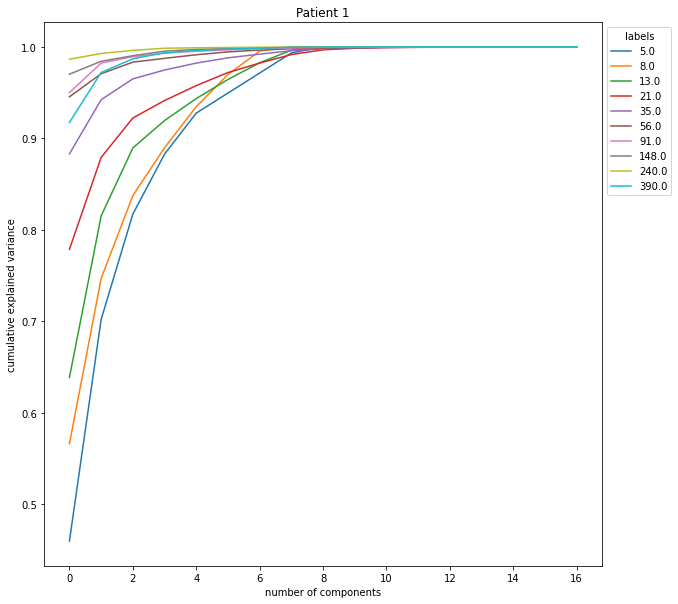

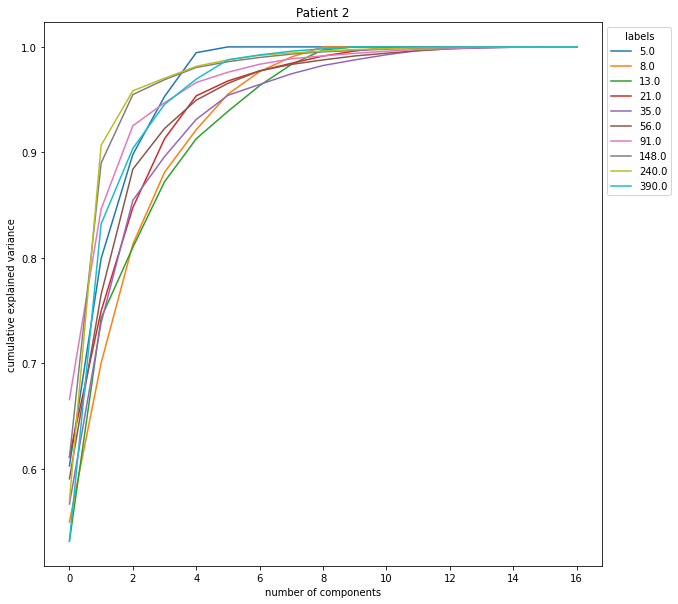

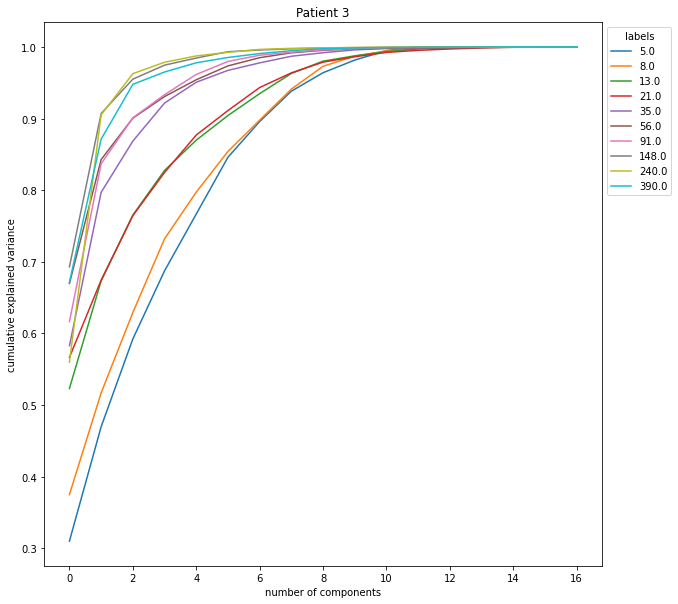

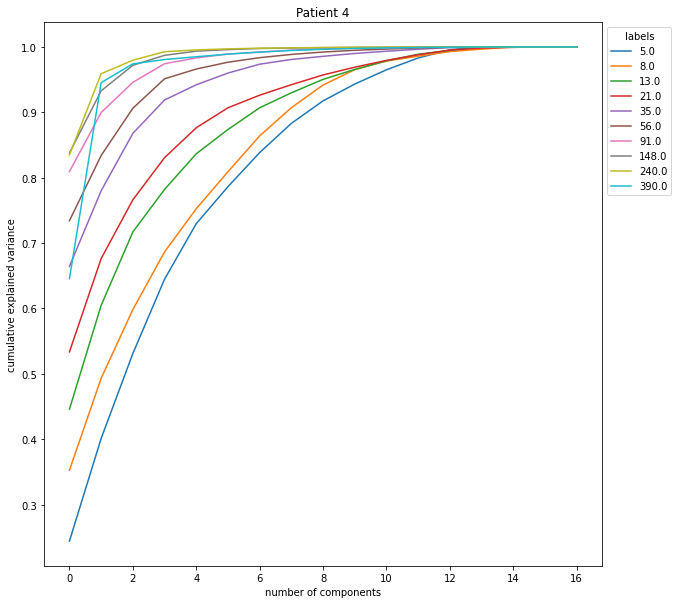

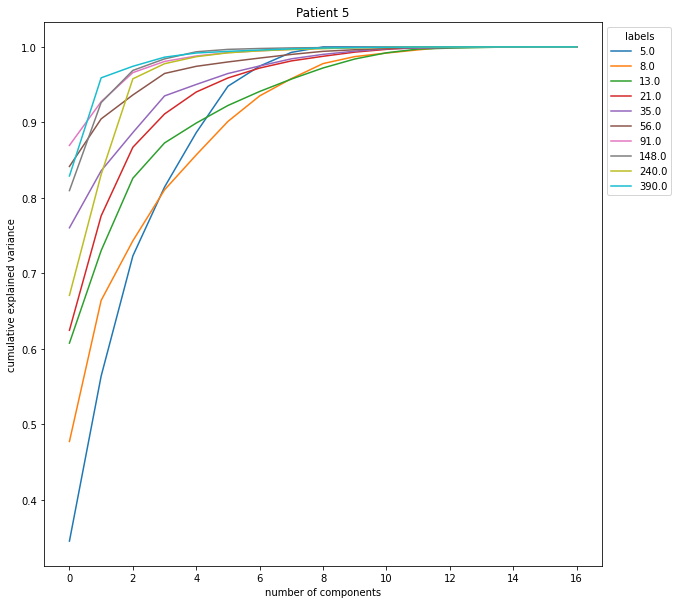

In [17]:
for p in patient_ids:
    plot_cev_radius(expr_var[p], p)

In [5]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}

In [6]:
expl_var_ratio

{1: {5.0: array([4.75032807e-001, 3.23471566e-001, 5.75990237e-002, 4.41949802e-002,
         4.20438072e-002, 3.69975388e-002, 1.48695863e-002, 5.79069153e-003,
         1.55169820e-033, 1.41016053e-034, 4.24328009e-035, 3.26423747e-038,
         1.46270367e-068, 3.98134959e-070, 6.21695406e-101, 0.00000000e+000,
         0.00000000e+000]),
  8.0: array([5.37570391e-01, 2.54155688e-01, 7.02378303e-02, 3.79184176e-02,
         3.46703682e-02, 2.18048353e-02, 1.70515262e-02, 1.32028566e-02,
         9.02573823e-03, 4.36234851e-03, 4.17256209e-34, 8.47517454e-35,
         7.92374264e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  13.0: array([6.74458058e-01, 1.34769244e-01, 7.84557313e-02, 3.42005533e-02,
         2.60840399e-02, 1.70845170e-02, 1.65796387e-02, 1.17311774e-02,
         3.25272221e-03, 2.87778179e-03, 5.06535952e-04, 5.00132801e-34,
         2.18061499e-34, 5.96929162e-35, 3.27122167e-68, 0.00000000e+00,
         0.00000000e+00]),
  21.0:

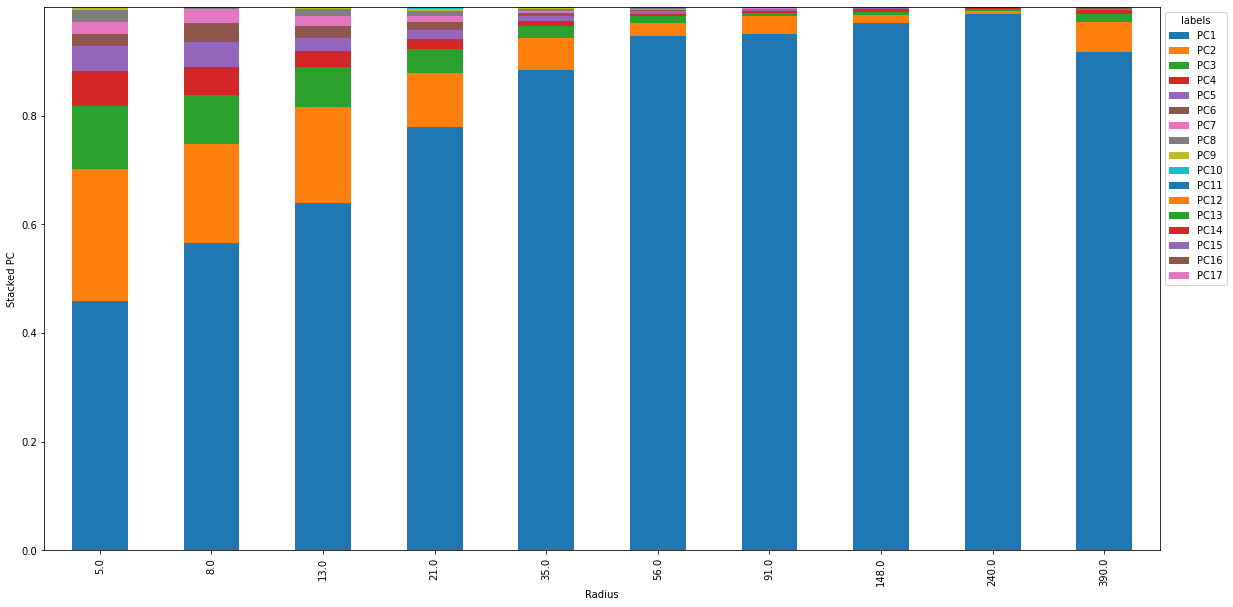

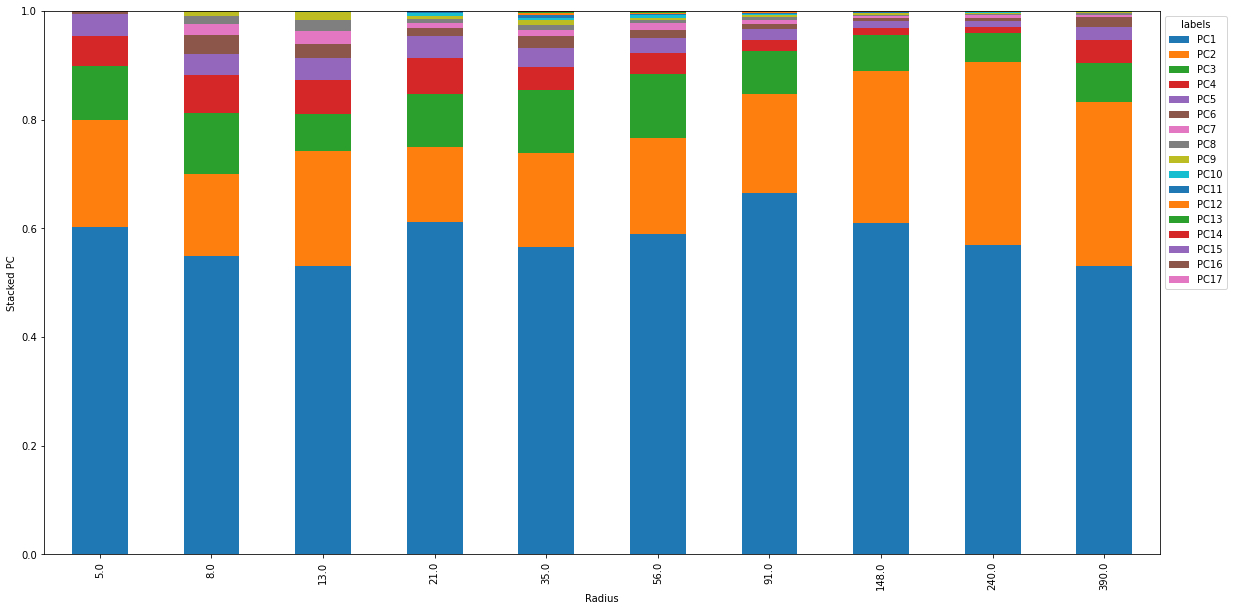

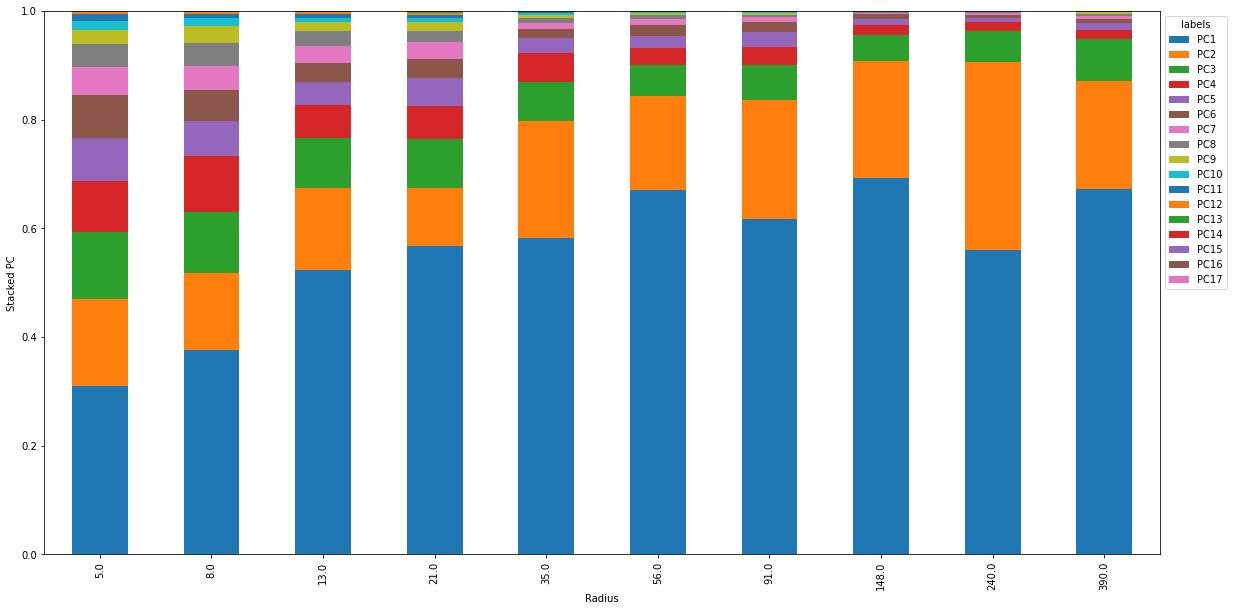

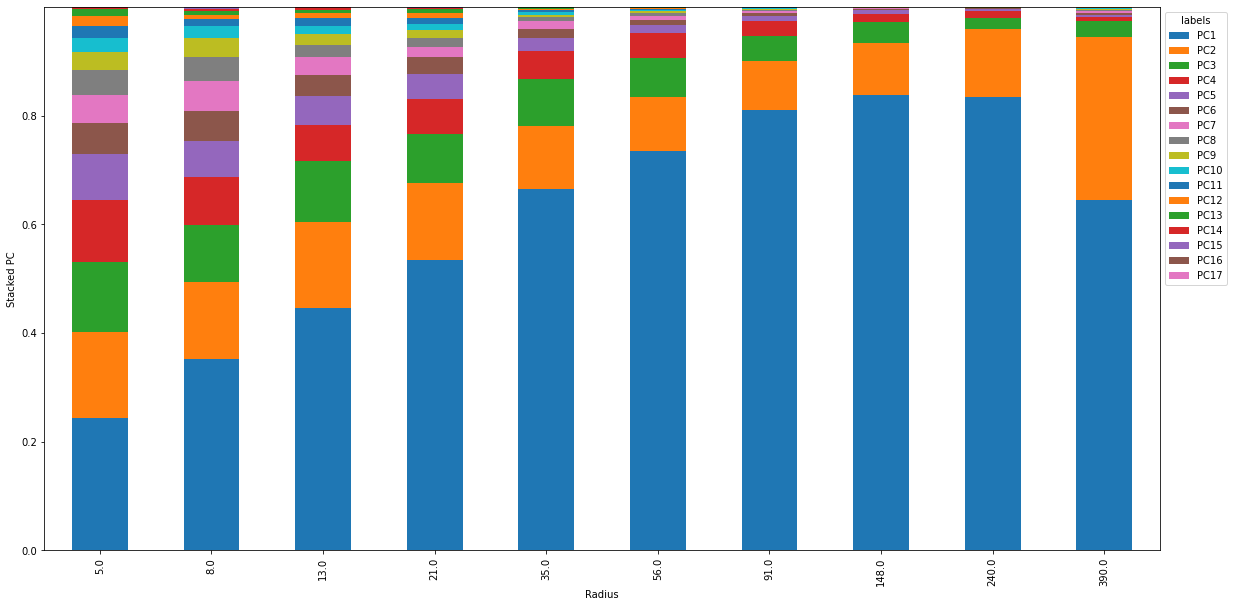

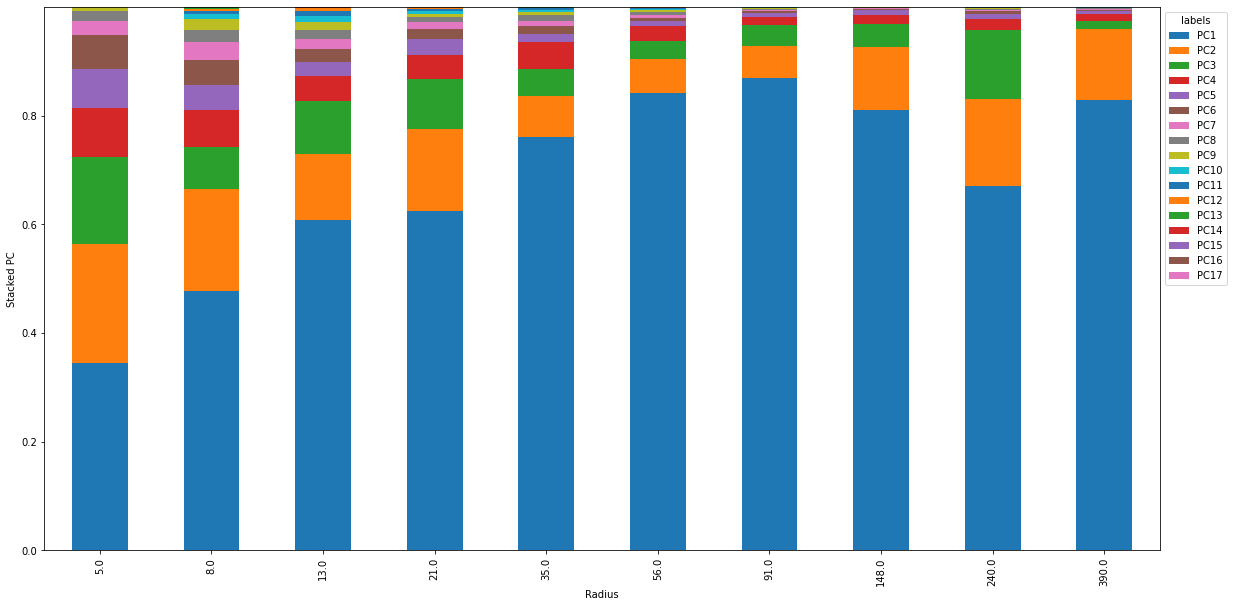

In [20]:
for p in patient_ids:
    plot_stacked_var_radius(expl_var_ratio[p])

In [78]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}
expl_var_ratio

{1: {5.0: array([4.75032807e-001, 3.23471566e-001, 5.75990237e-002, 4.41949802e-002,
         4.20438072e-002, 3.69975388e-002, 1.48695863e-002, 5.79069153e-003,
         1.55169820e-033, 1.41016053e-034, 4.24328009e-035, 3.26423747e-038,
         1.46270367e-068, 3.98134959e-070, 6.21695406e-101, 0.00000000e+000,
         0.00000000e+000]),
  8.0: array([5.37570391e-01, 2.54155688e-01, 7.02378303e-02, 3.79184176e-02,
         3.46703682e-02, 2.18048353e-02, 1.70515262e-02, 1.32028566e-02,
         9.02573823e-03, 4.36234851e-03, 4.17256209e-34, 8.47517454e-35,
         7.92374264e-36, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  13.0: array([6.74458058e-01, 1.34769244e-01, 7.84557313e-02, 3.42005533e-02,
         2.60840399e-02, 1.70845170e-02, 1.65796387e-02, 1.17311774e-02,
         3.25272221e-03, 2.87778179e-03, 5.06535952e-04, 5.00132801e-34,
         2.18061499e-34, 5.96929162e-35, 3.27122167e-68, 0.00000000e+00,
         0.00000000e+00]),
  21.0:

[[  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]
 [  5.   8.  13.  21.  35.  56.  91. 148. 240. 390.]] [[ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]

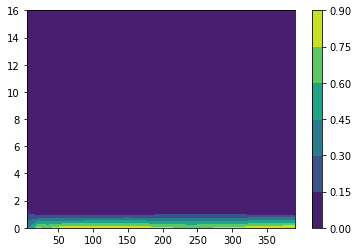

5.0 0 0.39959883549558006


In [98]:
def get_explained_variance2(X, Y, expl_var_ratio):
    z = np.empty((X.shape[0], Y.shape[1]))
    for i, x in enumerate(X.T):
        z[:, i] = expl_var_ratio[p][x[0]]
    return z

def get_explained_variance(X, Y, expl_var_ratio):
    z = np.empty((X.shape[0], Y.shape[1]))
    combinations = list(np.array((X, Y)).T.reshape(-1, 2))
    print(combinations)
    for 
    return z
    
p = 5
x = list(expl_var_ratio[p].keys())
y = np.arange(0, 17)
X, Y = np.meshgrid(x, y)
print(X,Y)
Z = get_explained_variance(X, Y, expl_var_ratio)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

print(X[0][0], Y[0][0], Z[0][0])

In [22]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z.shape

(40, 50)